In [2]:
# import time
import os
from skimage import io
import scipy as sp
import numpy as np
# import sys
import openpnm as op
import porespy as ps
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rcParams
np.set_printoptions(precision=4)
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import math
import pickle
import seaborn as sns

In [3]:
# Matplotlib plotting controls
plt.rc('axes', linewidth=2)
plt.rc('font', weight='bold')
params = {'figure.autolayout': True,
          'figure.titleweight': 'bold',
          'font.weight': 'bold',
          'font.size': 14,
          'font.family': 'sans-serif',
          'font.sans-serif': 'Arial',
          'legend.fontsize': 12,
#           'legend.title_fontsize':10,
          'figure.figsize': (6, 5),
          'figure.titlesize': 14,
          'axes.labelsize': 12,
          'axes.labelweight': 'bold',
          'axes.titlesize': 14,
          'axes.linewidth': 2,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.top': True,
          'xtick.bottom': True,
          'xtick.labeltop': False,
          'xtick.labelbottom': True,
          'ytick.left': True,
          'ytick.right': True,
          'ytick.labelright': False,
          'ytick.labelleft': True,
          'ytick.major.size': 5.5,
          'ytick.major.width': 0.8,
          'xtick.major.size': 5.5,
          'xtick.major.width': 0.8,
          'ytick.minor.size': 3.5,
          'ytick.minor.width': 0.6,
          'xtick.minor.size': 3.5,
          'xtick.minor.width': 0.6,
        'xtick.minor.visible':True,
         'ytick.minor.visible':True}
rcParams.update(params)

In [50]:
path = './data/1p2um volumes/'

with open(path+"snow_solid_1p2um_networks.pkl", "rb") as f:
    snow_solid_networks = pickle.load(f)

with open(path+"snow_void_1p2um_networks.pkl", "rb") as f:
    snow_void_networks = pickle.load(f)

snow_total_networks = [snow_solid_networks,snow_void_networks]

In [103]:
test_snow = snow_total_networks[1][1][1]

print('pore volume:')
print(test_snow['pore.volume'])
print(test_snow['pore.region_volume'])
test_volume = op.models.geometry.pore_volume.sphere(test_region,pore_diameter='pore.equivalent_diameter')
test_volume = test_snow['pore.equivalent_diameter']**3 * np.pi/6
print(test_volume)
print()

print('pore surface area:')
print(test_snow['pore.surface_area'])
test_pore_surface_area = op.models.geometry.pore_surface_area.sphere(test_region,pore_diameter='pore.equivalent_diameter')
print(test_pore_surface_area)
print()


pore volume:
[5.8752e-23 1.1858e-22 5.3486e-21 ... 1.2312e-23 4.3416e-23 3.8880e-24]
[5.8752e-23 1.1858e-22 5.3486e-21 ... 1.2312e-23 4.3416e-23 3.8880e-24]
[5.8752e-23 1.1858e-22 5.3486e-21 ... 1.2312e-23 4.3416e-23 3.8880e-24]

pore surface area:
[3.8520e-15 6.4800e-15 3.6432e-14 ... 1.8360e-15 6.1560e-15 6.4800e-16]
[5.2206e-15 4.7966e-15 0.0000e+00 ... 1.8945e-15 3.5618e-15 9.7974e-16]



# Water retention curves - old - testing 

In [77]:
#Create OpenPNM project objects
pn_solid = []
pn_void = []

for x in snow_solid_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_solid.append(pn_temp)
    
for x in snow_void_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [ ]:
test_region = pn_total[1][1][1]
print(test_region)



══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Network at 0x1819be840>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  throat.conns                                                  2159 / 2159
  3  pore.coords                                                   1194 / 1194
  4  pore.region_label                                             1194 / 1194
  5  pore.phase                                                    1194 / 1194
  6  throat.phases                                                 2159 / 2159
  7  pore.region_volume                                            1194 / 1194
  8  pore.equivalent_diameter                                      1194 / 1194
  9  pore.local_peak                                               1194 / 1194
 10 

In [ ]:
test_region = pn_total[1][1][1]

print('throat length')
print(test_region['throat.total_length'])
conduit_lengths = op.models.geometry.conduit_lengths.cones_and_cylinders(test_region,
    pore_diameter='pore.equivalent_diameter',throat_diameter = 'throat.inscribed_diameter')
test_throat_length = conduit_lengths[:,1]
print(test_throat_length)
print()

# print('diffusive_size_factors')
# print(test_geo['throat.diffusive_size_factors.pore1'])
# diffusive_size_factors = op.models.geometry.diffusive_size_factors.cones_and_cylinders(test_geo)
# print(diffusive_size_factors['pore1'])


print(test_region)

throat length
[6.9358e-08 5.0318e-08 4.2017e-08 ... 2.4888e-08 2.5995e-08 1.8637e-08]
[1.1169e-08 1.0000e-15 1.0000e-15 ... 1.0000e-15 1.0000e-15 1.0000e-15]



In [54]:
for s,sample in enumerate(pn_total[1]):
    for r,region in enumerate(sample):

        h = op.utils.check_network_health(region)
        op.topotools.trim(network=region, pores=h['disconnected_pores'])
        region.regenerate_models()


        region['pore.diameter'] = region['pore.extended_diameter']
        region['throat.diameter'] = region['throat.inscribed_diameter']
        
        region.add_model(propname='throat.coords',model=op.models.geometry.throat_centroid.pore_coords)
       
        region.add_model(propname='throat.length',model=op.models.geometry.throat_length.hybrid_cones_and_cylinders)
        region.add_model(propname='throat.volume',model=op.models.geometry.throat_volume.cylinder)

        region.regenerate_models()

In [55]:
phases = []       
for s,sample in enumerate(pn_total[1]):
        sample_phases = []
        for r,region in enumerate(sample):
                phase = op.phase.Phase(network=region, name='phase_{}_{}'.format(s,r))
                phase['pore.contact_angle'] =  105  
                phase['pore.surface_tension'] = 0.0626 
                # phase['throat.contact_angle'] =  105
                # phase['throat.surface_tension'] = 0.0626

                # phase.add_model_collection(op.models.collections.phase.water)
                # phase.add_model_collection(op.models.collections.physics.basic)


                phase.add_model(propname='throat.entry_pressure',model=op.models.physics.capillary_pressure.washburn,
                                # surface_tension='throat.surface_tension',
                                # contact_angle='thraot.contact_angle',
                                # diameter='throat.diameter'
                                )
                phase.regenerate_models()

                sample_phases.append(phase)
        phases.append(sample_phases)



In [56]:
print(phases[0][0]['throat.contact_angle'])
print(phases[0][0]['throat.surface_tension'])

[105. 105. 105. ... 105. 105. 105.]
[0.0626 0.0626 0.0626 ... 0.0626 0.0626 0.0626]


In [68]:
percs = []
drains = []
for s,sample in enumerate(pn_total[1]):
    sample_percs = []
    sample_drains = []
    for r,region in enumerate(sample):

        inlets = region.pores('ymax')
        used_inlets = [inlets[y] for y in range(0, len(inlets), 1)]
        op.algorithms.InvasionPercolation(network=region,phase=phases[s][r]).reset()
        perc = op.algorithms.InvasionPercolation(network=region,phase=phases[s][r],name='perc_{}_{}'.format(s,r))
        perc.set_inlet_BC(pores = used_inlets)
        perc.run()


        inlets = region.pores('ymax')
        used_inlets = [inlets[y] for y in range(0, len(inlets), 1)]
        op.algorithms.Drainage(network=region,phase=phases[s][r]).reset()
        drain = op.algorithms.Drainage(network=region,phase=phases[s][r],name='drain_{}_{}'.format(s,r))
        drain.set_inlet_BC(pores = used_inlets)
        drain.run()

        sample_percs.append(perc)
        sample_drains.append(drain)
    percs.append(sample_percs)
    drains.append(sample_drains)

[12:56:15] WARNING  perc_0_0 is already taken, using perc_0_01 instead                              ]8;id=362087;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=444422;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_0_0 is already taken, using drain_0_01 instead                            ]8;id=581100;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=255142;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_0_1 is already taken, using perc_0_02 instead                              ]8;id=52323;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=962120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_0_1 is already taken, using drain_0_02 instead                            ]8;id=677447;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=469104;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_0_2 is already taken, using perc_0_03 instead                              ]8;id=972830;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=306303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_0_2 is already taken, using drain_0_03 instead                            ]8;id=321331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=285306;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_0_3 is already taken, using perc_0_04 instead                              ]8;id=803873;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=632994;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_0_3 is already taken, using drain_0_04 instead                            ]8;id=451375;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=930351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_0_4 is already taken, using perc_0_05 instead                              ]8;id=272881;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=998992;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_0_4 is already taken, using drain_0_05 instead                            ]8;id=674044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=416756;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_0_5 is already taken, using perc_0_06 instead                              ]8;id=332052;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=719845;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_0_5 is already taken, using drain_0_06 instead                            ]8;id=758774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=986870;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_1_0 is already taken, using perc_1_01 instead                              ]8;id=162208;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=310582;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_1_0 is already taken, using drain_1_01 instead                            ]8;id=634824;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=258370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_1_1 is already taken, using perc_1_02 instead                              ]8;id=236729;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=141458;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_1_1 is already taken, using drain_1_02 instead                            ]8;id=768083;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=902397;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_1_2 is already taken, using perc_1_03 instead                              ]8;id=733562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=810916;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_1_2 is already taken, using drain_1_03 instead                            ]8;id=507761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=17390;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

[12:56:16] WARNING  perc_1_3 is already taken, using perc_1_04 instead                              ]8;id=318356;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=697976;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_1_3 is already taken, using drain_1_04 instead                            ]8;id=778654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=625857;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_1_4 is already taken, using perc_1_05 instead                              ]8;id=694745;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=132248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_1_4 is already taken, using drain_1_05 instead                            ]8;id=555661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=300134;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_1_5 is already taken, using perc_1_06 instead                              ]8;id=731063;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=894519;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_1_5 is already taken, using drain_1_06 instead                            ]8;id=522378;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=183895;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_2_0 is already taken, using perc_2_01 instead                              ]8;id=222266;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=40342;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_2_0 is already taken, using drain_2_01 instead                            ]8;id=862732;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=417342;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_2_1 is already taken, using perc_2_02 instead                              ]8;id=213351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=396076;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_2_1 is already taken, using drain_2_02 instead                            ]8;id=568598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=5285;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_2_2 is already taken, using perc_2_03 instead                              ]8;id=913460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=884788;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_2_2 is already taken, using drain_2_03 instead                            ]8;id=509382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=925440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_2_3 is already taken, using perc_2_04 instead                              ]8;id=16229;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=605227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_2_3 is already taken, using drain_2_04 instead                            ]8;id=983300;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=762088;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_2_4 is already taken, using perc_2_05 instead                              ]8;id=780626;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=303158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_2_4 is already taken, using drain_2_05 instead                            ]8;id=187022;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=578439;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

           WARNING  perc_2_5 is already taken, using perc_2_06 instead                              ]8;id=90819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=951501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_2_5 is already taken, using drain_2_06 instead                            ]8;id=632180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=784507;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

In [69]:
print(drains[0][0])


══════════════════════════════════════════════════════════════════════════════
drain_0_01 : <openpnm.algorithms.Drainage at 0x182aef420>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.invasion_pressure                                        1669 / 1669
  3  throat.invasion_pressure                                      3281 / 3281
  4  pore.invasion_sequence                                        1669 / 1669
  5  throat.invasion_sequence                                      3281 / 3281
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                           

In [70]:
perc_pcs = []
perc_sats = []
for s,sample in enumerate(percs):
    sample_pcs = []
    sample_sats = []
    for r,region in enumerate(sample):
        region_pc = []
        region_sat_tot = []

        pc = region.pc_curve().pc
        sat = region.pc_curve().snwp

        region_sat_tot.append(sat[0]) 
        region_pc.append(pc[0])
        for i,x in enumerate(sat):
            if  sat[i] - region_sat_tot[-1] > 0.0:
                region_pc.append(pc[i])
                region_sat_tot.append(sat[i])
        sample_pcs.append(region_pc)
        sample_sats.append(region_sat_tot)
    perc_pcs.append(sample_pcs)
    perc_sats.append(sample_sats)

In [71]:
drain_pcs = []
drain_sats = []
for s,sample in enumerate(drains):
    sample_pcs = []
    sample_sats = []
    for r,region in enumerate(sample):
        region_pc = []
        region_sat_tot = []

        pc = region.pc_curve().pc
        sat = region.pc_curve().snwp

        region_sat_tot.append(sat[0]) 
        region_pc.append(pc[0])
        for i,x in enumerate(sat):
            if  sat[i] - region_sat_tot[-1] > 0.0:
                region_pc.append(pc[i])
                region_sat_tot.append(sat[i])
        sample_pcs.append(region_pc)
        sample_sats.append(region_sat_tot)
    drain_pcs.append(sample_pcs)
    drain_sats.append(sample_sats)

In [72]:
print(drain_pcs[0][0])
print(len(drain_pcs[0][0]))

[348943.80156821513, 407822.7787525255, 476636.69084237196, 557061.9075081765, 651057.6603916414, 760913.7717757437, 889306.4367443266, 1039363.4177355577, 1214740.239688064, 1419709.2419629912, 1659263.6564280728, 1939239.2471407414, 2266456.4748839247, 2648886.6498123524, 3095846.1198393293, 3618223.2253702367, 4228743.549207166, 5776214.744772045]
18


In [73]:
#log normal mean (diam [nm])
ln_mu_diam = np.array([4.6565,4.9255,4.5715])
#log normal std (same for diam or radius)
ln_sigma = np.array([0.6352,0.7396,0.6127])

ln_mu_rad = np.log(np.exp(ln_mu_diam)/2)
print('ln_mu_rad: ',ln_mu_rad)

rm = np.exp(ln_mu_rad + (ln_sigma**2/2))*10**-9
print('Rm: ',rm)

pcap = np.logspace(4,7,100)*1
gamma = 0.0626
theta = 105

rcap = -2*gamma*np.cos(np.deg2rad(theta))/pcap


ln_mu_rad:  [3.9634 4.2324 3.8784]
Rm:  [6.4399e-08 9.0546e-08 5.8326e-08]


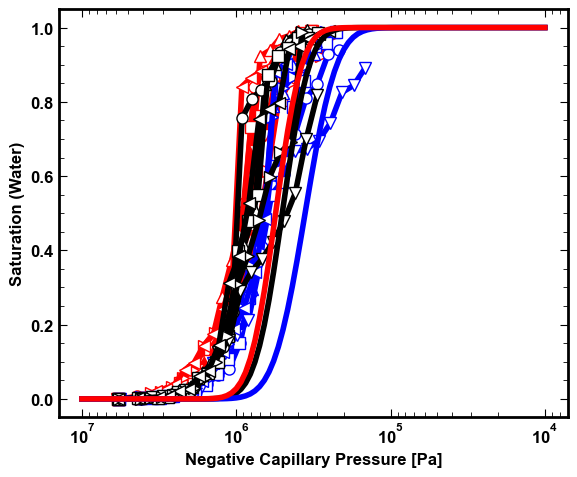

In [74]:
fig, ax = plt.subplots()

line_colors =['k','b','r']
shapes = ['^','o','s','v','>','<']
zorders = [100,99,98]

for s,sample in enumerate(perc_pcs):
    for r,region in enumerate(sample):
        # if s==1 and r==4:
        if True:
            # ax.plot(region,1-np.array(perc_sats[s][r]),color = line_colors[s], marker = shapes[r], 
            #         markeredgewidth=0.5, markerfacecolor='white',zorder=zorders[s])
            ax.plot(drain_pcs[s][r],1-np.array(drain_sats[s][r]),linewidth=4,color = line_colors[s], marker = shapes[r], 
                    markeredgewidth=1,markersize=8, markerfacecolor='white',zorder=zorders[s])
            


for i,sample in enumerate(rm):
    rk = rm[i]
    sk = ln_sigma[i]/2
    x = np.log(rcap/rk)/(sk*np.sqrt(2))
    s = 0.5*(1+sp.special.erf(x))
    ax.plot(pcap*1,s,color=line_colors[i], linewidth=4,zorder=200)

ax.set_xlabel("Negative Capillary Pressure [Pa]")
ax.set_ylabel("Saturation (Water)")
ax.set_xscale('log')
# ax.set_xlim([10**7, 10**4])
ax.invert_xaxis()
plt.tick_params(axis='x', which='minor')



In [75]:
#interpolation to average water retention curves for each sample across regions

x_interp = []
y_interp = []

x_all = []
f_avg = []

drain_pcs_cut = drain_pcs.copy()
drain_sats_cut = drain_sats.copy()

for s,sample in enumerate(drain_pcs_cut):
    sample_x_data = []
    sample_y_data = []
    sample_x_min_vals = []
    sample_x_max_vals = []
    sample_interp_funcs = []
    for r,region in enumerate(sample):
        sample_x_data.append(region)
        sample_y_data.append(drain_sats_cut[s][r])
        sample_x_max_vals.append(max(region))
        sample_x_min_vals.append(min(region))
        sample_interp_funcs.append(interp1d(region, drain_sats_cut[s][r]))
        
    x_max = math.floor(min(sample_x_max_vals))
    x_min = math.ceil(max(sample_x_min_vals))
    
    # define common carrier for calculation of average curve
    sample_x_all   = np.geomspace(x_min, x_max, num=50)
    
    sample_f_int = []
    for r,region in enumerate(sample):
        # evaluation of fits on common carrier
        sample_f_int.append(sample_interp_funcs[r](sample_x_all))
        
    # put all fits to one matrix for fast mean calculation
    data_collection = np.vstack(sample_f_int)

    # calculating mean value
    sample_f_avg = np.average(data_collection, axis=0)

    x_interp.append(sample_x_data)
    y_interp.append(sample_y_data)
    x_all.append(sample_x_all)
    f_avg.append(sample_f_avg)


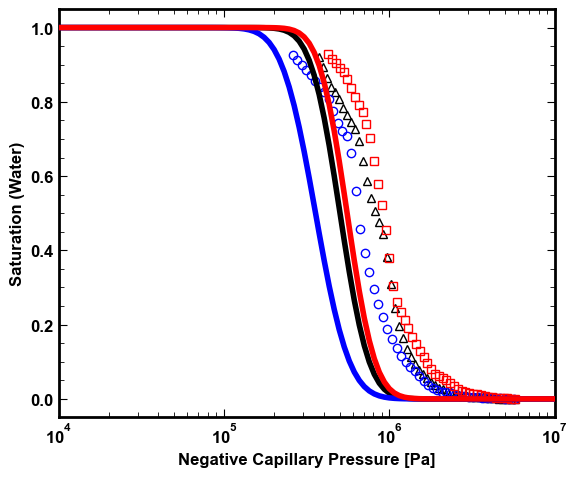

In [76]:
fig, ax = plt.subplots()

colors =['k','b','r']
shapes = ['^','o', 's']

for s,sample in enumerate(f_avg):
    ax.plot(x_all[s],1-np.array(f_avg[s]),' ',color=colors[s], marker=shapes[s], markerfacecolor='none')


for i,sample in enumerate(rm):
    rk = rm[i]
    sk = ln_sigma[i]/2
    x = np.log(rcap/rk)/(sk*np.sqrt(2))
    s = 0.5*(1+sp.special.erf(x))
    ax.plot(pcap*1,s,color=line_colors[i], linewidth=4,zorder=200)

ax.set_xlabel("Negative Capillary Pressure [Pa]")
ax.set_ylabel("Saturation (Water)")
ax.set_xscale('log')
ax.set_xlim([10**7, 10**4])
ax.invert_xaxis()
plt.tick_params(axis='x', which='minor')

